# Classifying Digits using ensemble techniques

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [13]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

To remind us what we're looking at, we'll visualize the first few data points:

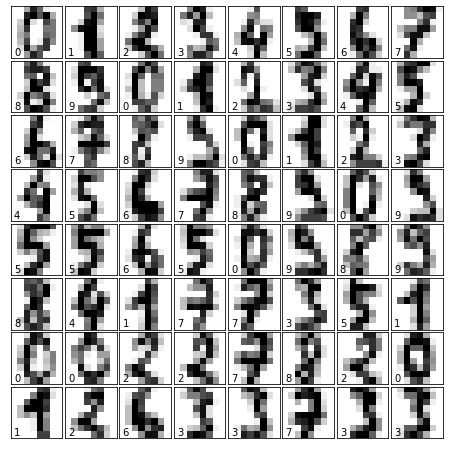

In [14]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can quickly classify the digits using a random forest as follows:

In [15]:
digits.images.shape

(1797, 8, 8)

In [16]:
digits.data.shape

(1797, 64)

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)

In [18]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1347, 64), (450, 64), (1347,), (450,))

## DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.81      0.90      0.85        39
           2       0.84      0.82      0.83        45
           3       0.80      0.69      0.74        52
           4       0.84      0.82      0.83        39
           5       0.90      0.88      0.89        49
           6       0.94      1.00      0.97        49
           7       0.81      0.95      0.88        41
           8       0.81      0.83      0.82        47
           9       0.83      0.76      0.80        51

    accuracy                           0.85       450
   macro avg       0.85      0.86      0.85       450
weighted avg       0.85      0.85      0.85       450



In [33]:
# Training accuracy
ypred = model.predict(Xtrain)
print(metrics.classification_report(ypred, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00       133
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00       143
           5       1.00      1.00      1.00       134
           6       1.00      1.00      1.00       129
           7       1.00      1.00      1.00       131
           8       1.00      1.00      1.00       126
           9       1.00      1.00      1.00       133

    accuracy                           1.00      1347
   macro avg       1.00      1.00      1.00      1347
weighted avg       1.00      1.00      1.00      1347



## RandomForestClassifier

In [19]:
model = RandomForestClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

We can take a look at the classification report for this classifier:

In [23]:
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.96      0.93      0.95        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.98      0.99        49
           8       0.94      0.98      0.96        46
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



And for good measure, plot the confusion matrix:

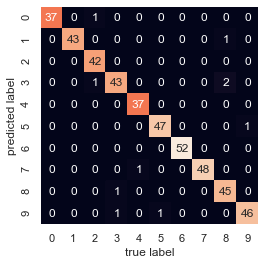

In [24]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

We find that a simple, untuned random forest results in a very accurate classification of the digits data.

## AdaBoostClassifier

In [34]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.08      0.08      0.08        36
           5       0.02      1.00      0.04         1
           6       0.46      0.26      0.34        91
           7       0.90      0.16      0.28       262
           8       0.00      0.00      0.00         0
           9       0.30      0.61      0.40        23

    accuracy                           0.26       450
   macro avg       0.26      0.30      0.20       450
weighted avg       0.71      0.26      0.33       450



c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [35]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtrain)
print(metrics.classification_report(ypred, ytrain))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       138
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.16      0.23      0.19       102
           5       0.03      0.40      0.06        10
           6       0.54      0.27      0.36       260
           7       0.96      0.16      0.28       771
           8       0.00      0.00      0.00         0
           9       0.32      0.65      0.43        66

    accuracy                           0.29      1347
   macro avg       0.29      0.26      0.22      1347
weighted avg       0.78      0.29      0.36      1347



c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user1\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

## GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.98      0.95      0.97        44
           2       0.91      1.00      0.95        40
           3       0.93      0.95      0.94        44
           4       0.95      0.97      0.96        37
           5       0.96      0.96      0.96        48
           6       0.94      1.00      0.97        49
           7       0.98      0.96      0.97        49
           8       0.98      0.90      0.94        52
           9       0.94      0.92      0.93        48

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



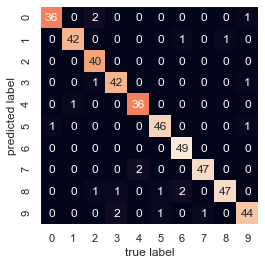

In [26]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print(metrics.classification_report(ypred, ytest))

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');